In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
#conda install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image
import numpy as np
import os

#Get training file paths
train_dir_fake = "../archive/train/FAKE/"
train_dir_real = "../archive/train/REAL/"

file_paths_fake = os.listdir(train_dir_fake)
file_paths_real = os.listdir(train_dir_real)

#IGNORE DS STORE 
valid_file_paths_real = [file for file in file_paths_real if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'))]
valid_file_paths_fake = [file for file in file_paths_fake if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'))]

#empty file path data to add to
image_data = []


#2. Load and Convert Images (Both paths)
for file_path in valid_file_paths_fake:#
    s = "../archive/train/FAKE/" + str(file_path)
    image = Image.open(s)
    
    #3. Convert the image to a numpy array
    image_array = np.array(image)
    
 
    #4. resize image 
    resized_img = np.resize(image,(64, 64))
    
    #5. normalize image in range [0, 1]
    normalized_img = resized_img / 255.0

    #6. Center image
    mean_image = np.mean(normalized_img, axis=(0, 1))
    centered_img = normalized_img - mean_image

    #7. Flatten image
    flattened_img = centered_img.flatten()
    
    
    image_data.append(flattened_img)

#2. Load and Convert Images (Both paths)
for file_path in valid_file_paths_real:#
    s = "../archive/train/REAL/" + str(file_path)
    image = Image.open(s)
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    #4. resize image 
    resized_img = np.resize(image,(64, 64))
    
    #5. normalize image in range [0, 1]
    normalized_img = resized_img / 255.0

    #6. Center image
    mean_image = np.mean(normalized_img, axis=(0, 1))
    centered_img = normalized_img - mean_image

    #7. Flatten image
    flattened_img = centered_img.flatten()
    
    
    image_data.append(flattened_img)

    


# Convert the list of image data into a numpy array
data_matrix = np.array(image_data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_matrix)




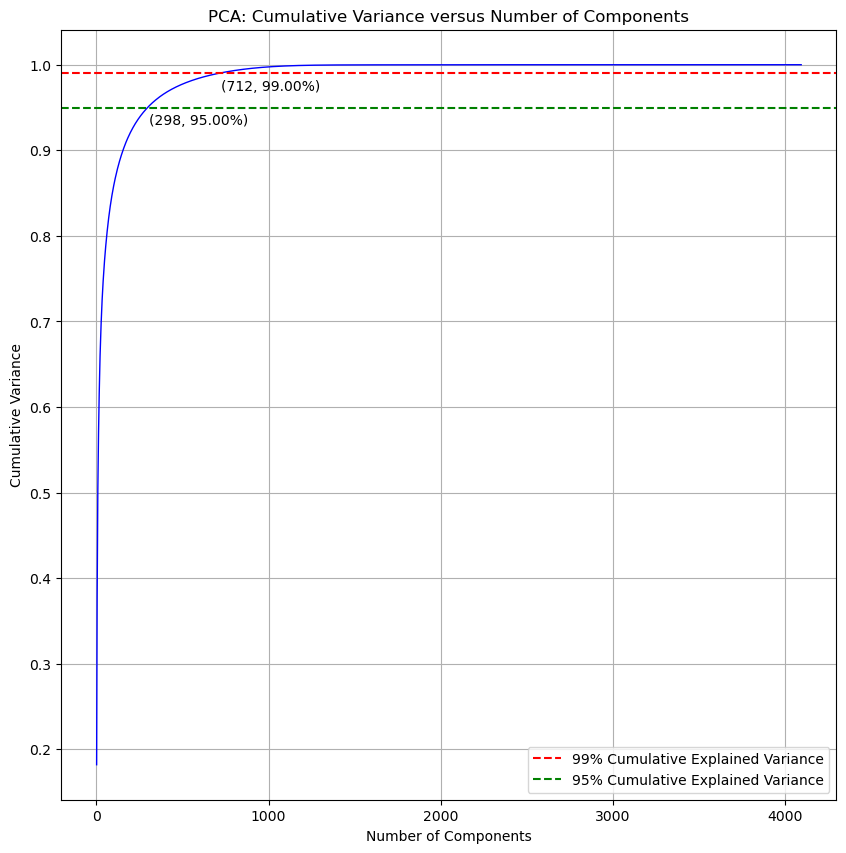

In [5]:
# Step 1: Perform PCA
# Number of components
n_components = data_matrix.shape[1]  
pca = PCA(n_components=n_components)
pca.fit(data_matrix)

# Step 2: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Create a plot
plt.figure(figsize=(10, 10))
plt.plot(range(1, n_components + 1), cumulative_variance, linestyle='-', linewidth=1.0, color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('PCA: Cumulative Variance versus Number of Components')
plt.grid()

threshold_99 = 0.99
threshold_95 = 0.95
n_components_threshold_99 = np.argmax(cumulative_variance >= threshold_99) + 1
n_components_threshold_95 = np.argmax(cumulative_variance >= threshold_95) + 1

plt.axhline(threshold_99, color='r', linestyle='--', label=f'99% Cumulative Explained Variance')
plt.axhline(threshold_95, color='g', linestyle='--', label=f'95% Cumulative Explained Variance')

# Annotate the points
plt.annotate(f'({n_components_threshold_99}, {threshold_99 * 100:.2f}%)', xy=(n_components_threshold_99, threshold_99), xytext=(n_components_threshold_99 + 10, threshold_99 - 0.02))
plt.annotate(f'({n_components_threshold_95}, {threshold_95 * 100:.2f}%)', xy=(n_components_threshold_95, threshold_95), xytext=(n_components_threshold_95 + 10, threshold_95 - 0.02))

plt.legend()
plt.show()

In [11]:
#Compression ratio = (Number of Original Features) / (Number of Principal Components)

# Number of components
total_components = data_matrix.shape[1]  
print(f'Total components: {total_components}')
#use 0.95 cumulatie variance 
reduced_components = 254
ratio = total_components / reduced_components

print(f'Compression ratio: {round(ratio, 2)}')

print(f'The dimensionality of the data has been reduced by: {round(100 - ratio, 2)}% with 95% cumulative expected variance retained')



Total components: 4096
Compression ratio: 16.13
The dimensionality of the data has been reduced by: 83.87% with 95% cumulative expected variance retained


In [10]:
#Compression ratio = (Number of Original Features) / (Number of Principal Components)

# Number of components
total_components = data_matrix.shape[1]  
print(f'Total components: {total_components}')
#use 0.95 cumulatie variance 
reduced_components = 664
ratio = total_components / reduced_components

print(f'Compression ratio: {round(ratio, 2)}')

print(f'The dimensionality of the data has been reduced by: {round(100 - ratio, 2)}% with 99% cumulative expected variance retained')

Total components: 4096
Compression ratio: 6.17
The dimensionality of the data has been reduced by: 93.83% with 99% cumulative expected variance retained
